## cv2

In [1]:
import cv2

In [2]:
print(cv2.__version__)

4.6.0


###  image basic
    cv2.imread()
    cv2.imshow()
    cv2.imwrite()

###  video basic
    cv2.VideoCapture()
    cv2.VideoWriter()

In [4]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
while(True):
    # 一帧一帧捕捉
    ret, frame = cap.read()
    # 我们对帧的操作在这里
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 显示返回的每帧
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# 当所有事完成，释放 VideoCapture 对象
cap.release()
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture('vtest.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
# 声明编码器和创建 VideoWrite 对象
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
        # 写入已经翻转好的帧
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# 释放已经完成的工作
cap.release()
out.release()
cv2.destroyAllWindows()


###  paint basic
    cv2.line()
    cv2.circle()
    cv2.rectangle()
    cv2.ellipse()
    cv2.putText()
    cv2.setMouseCallback()

In [6]:
import cv2
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [5]:
import numpy as np
import cv2
# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
# 创建一个黑色图像，一个窗口，然后和回调绑定
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()


### 作为调色板的跟踪栏

In [4]:
import numpy as np
import cv2
def nothing(x):
    pass
# 创建一个黑色图像，一个窗口
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# 创建一个改变颜色的轨迹栏
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
# 创建一个用来启用和关闭功能的开关
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv2.destroyAllWindows()


    Numpy 是一个用于快速阵列计算的优化库。因此，简单地访问每个像素值并修改其值将非常缓慢，并不鼓励这样做。
    
    对于单个像素的访问，可以选择使用 Numpy 数组方法中的 array.item()和 array.itemset()，注意它们的返回值是一个标量。如果需要访问所有的 G、R、B 的值，则需要所有像素分别调用 array.item()。

### 图像属性

In [5]:
img = cv2.imread("lena.jpg")

In [6]:
img.shape

(263, 263, 3)

In [7]:
img.size

207507

In [8]:
img.dtype

dtype('uint8')

### 拆分和合并图像通道

In [ ]:
## 时间代价高昂
b,g,r = CV.spilt(img)
img = CV.merge((b,g,r))

In [ ]:
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]


### 制作图像边界（填充）
    cv2.copyMakeBorder(img, top, bottom, left, right, borderType, value)
    borderType:
    cv2.BORDER_CONSTANT- 添加一个恒定的彩色边框。该值应作为下一个参数value给出。
    cv2.BORDER_REFLECT-边框将是边框元素的镜像反射，如下所示：fedcba|abcdefgh|hgfedcb
    cv2.BORDER_REFLECT_101或者 cv2.BORDER_DEFAULT-与上面相同，但略有改动，如下所示： gfedcb | abcdefgh | gfedcba
    cv2.BORDER_REPLICATE -最后一个元素被复制，如下所示： aaaaaa | abcdefgh | hhhhhhh
    cv2.BORDER_WRAP-不好解释，它看起来像这样： cdefgh | abcdefgh | abcdefg

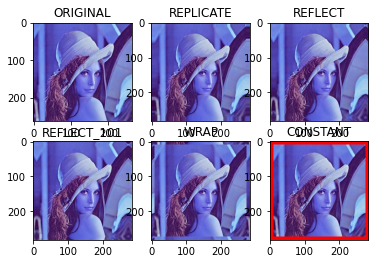

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv2.imread('lena.jpg')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()


### 图像算数运算


In [11]:
# OpenCV 相加操作和 Numpy 相加操作之间存在差异。
# OpenCV 添加是饱和操作，而 Numpy 添加是模运算。
# 两种加法对于结果溢出的数据，会通过某种方法使其在限定的数据范围内。
# 在将两个图象相加时会发现 OpenCV 函数能够提供更好的结果，所以尽可能地选择 OpenCV 函数。


x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x,y)) #250 + 10 =260 => 255

print(x + y)

[[255]]
[4]


In [16]:
img1= cv2.imread('lena.jpg')
# 浅灰色背景
img2= np.full_like(img1,200)

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 按位操作

In [ ]:
#加载两张图片
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('opencv-logo-white.png')
#我想在左上角放置一个logo，所以我创建了一个 ROI,并且这个ROI的宽和高为我想放置的logo的宽和高
rows,cols,channels = img2.shape
roi = img1 [0:rows,0:cols]
#现在创建一个logo的掩码，通过对logo图像进行阈值，并对阈值结果并创建其反转掩码
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(img2gray,10,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
#现在使 ROI 中的徽标区域变黑
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
#仅从徽标图像中获取徽标区域。
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
#在 ROI 中放置徽标并修改主图像
dst = cv2.add(img1_bg,img2_fg)
img1 [0:rows,0:cols] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 性能测量和改进

In [19]:
e1 = cv2.getTickCount()
#执行代码
e2 = cv2.getTickCount()
time = (e2 - e1)/cv2.getTickFrequency()
time

6.14e-05

In [23]:
img1 = cv2.imread('lena.jpg')
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
t

0.1629497

In [24]:
cv2.useOptimized()

True

In [25]:
%timeit res = cv2.medianBlur(img,49)

8.01 ms ± 264 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
cv2.setUseOptimized(False)

In [28]:
cv2.useOptimized()

False

In [30]:
%timeit res = cv2.medianBlur(img,49)

8.12 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Python 标量操作比 Numpy 标量操作更快
    因此对于包含一个或两个元素的操作，Python 标量比 Numpy 数组更好。当阵列的大小稍大时，Numpy 会占据优势。
#### 优化性能
    尽量避免在 Python 中使用循环，尤其是双循环/三循环等。它们本质上很慢。
    将算法/代码矢量化到最大可能范围，因为 Numpy 和 OpenCV 针对向量运算进行了优化。
    利用缓存一致性。
    除非必要，否在尽量不要使用深拷贝
    即使在完成所有这些操作之后，如果您的代码仍然很慢，或者使用大型循环是不可避免的，请使用其他库（如 Cython）来加快速度。


### 改变颜色空间
    HSV:
        色调(Hue)范围为 [0,179]
        饱和度(Saturation)范围为 [0,255]
        明亮度(Value)为 [0,255]
    不同的软件使用不同的比例. 所以如果想用 OpenCV 的值与别的软件的值作对比，你需要归一化这些范围。

In [3]:
import cv2
img = cv2.imread('lena.jpg')


In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('gray',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('hsv',hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np
cap = cv2.VideoCapture("test.mp4")
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()


In [4]:
# BGR2HSV
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


### 图像几何变换

In [2]:
import cv2
import numpy as np

img = cv2.imread("lena.jpg")
res = cv2.resize(img, dsize=None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()
# or
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# 平移
img = cv2.imread("lena.jpg",0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 旋转
img = cv2.imread("lena.jpg",0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
# 第一个参数旋转中心，第二个参数旋转角度，第三个参数：缩放比例
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

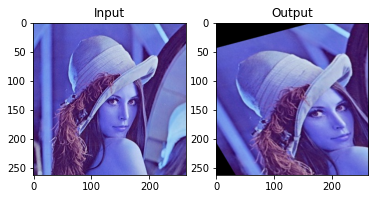

In [8]:
# 仿射变换
import matplotlib.pyplot as plt
img = cv2.imread('lena.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


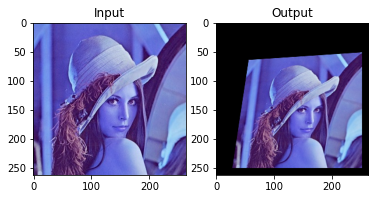

In [13]:
# 透视
img = cv2.imread('lena.jpg')
rows,cols,ch = img.shape
# 输入和输出图像上对应的四个点
pts1 = np.float32([[0,0],[262,0],[0,262],[262,262]])
pts2 = np.float32([[56,65],[250,52],[28,250],[250,250]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(rows,cols))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


### 图像阈值

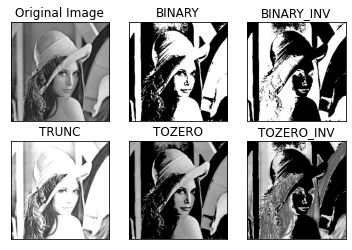

In [16]:
# 简单阈值法
"""
parm1:源图像，它应该是灰度图像;
parm2:阈值,用于对像素值进行分类;
parm3:maxval,它表示像素值大于（有时小于）阈值时要给定的值;
parm4:不同类型的阈值，由函数的第四个参数决定
cv2.THRESH_BINARY
cv2.THRESH_BINARY_INV
cv2.THRESH_TRUNC  trunc:截断
cv2.THRESH_TOZERO
cv2.THRESH_TOZERO_INV
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


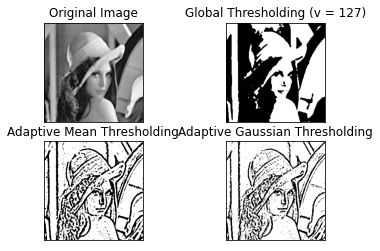

In [18]:
# 自适应阈值
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,7,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,7,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


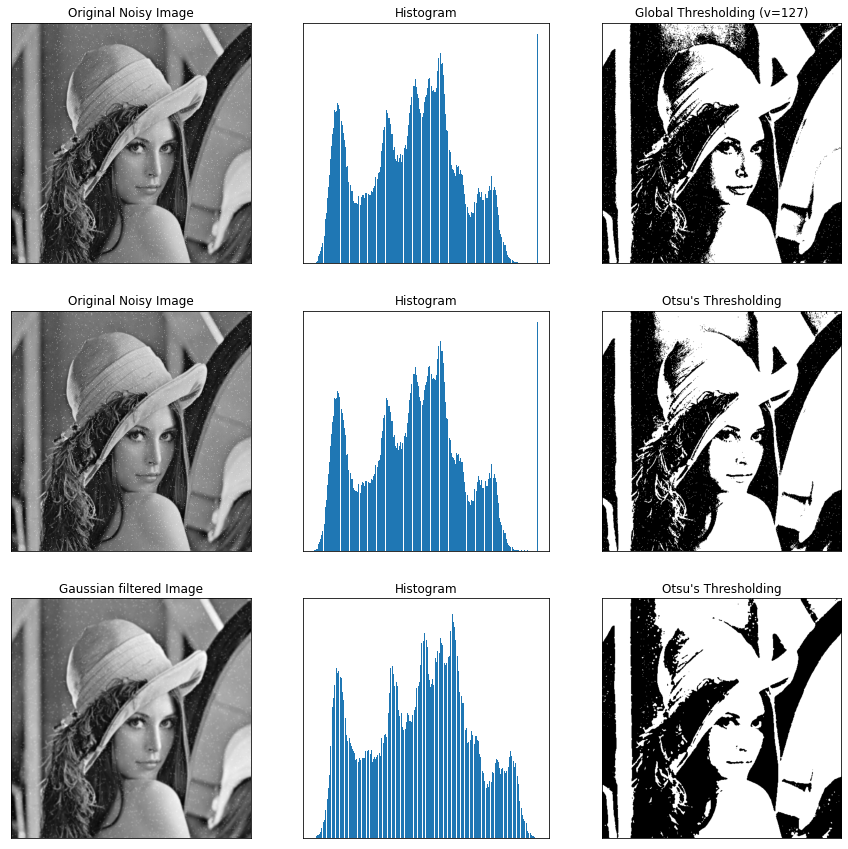

In [22]:
# Otsu 二值化
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lenaNoise.png',0)
# 全局阈值
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu 阈值
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# 经过高斯滤波的 Otsu 阈值
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# 画出所有的图像和他们的直方图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(15,15))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()



In [25]:
img = cv2.imread('lenaNoise.png',0)
blur = cv2.GaussianBlur(img,(5,5),0)
# 找到归一化直方图还有累计分布函数
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1

np.seterr(divide = 'ignore',invalid='ignore')
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # 概率
    q1,q2 = Q[i],Q[255]-Q[i] # 类别总和
    b1,b2 = np.hsplit(bins,[i]) # 权重
    # f 找到均值与方差
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # 计算最小函数
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# 用 OpenCV 函数的 otsu'阈值
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )


119 118.0


### 平滑图像
    低通滤波器（LPF）,LPF 有助于消除噪音、模糊图像等
    高通滤波器（HPF）,HPF 滤波器有助于在图像中找到边缘

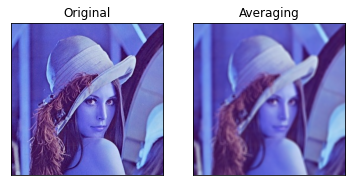

In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


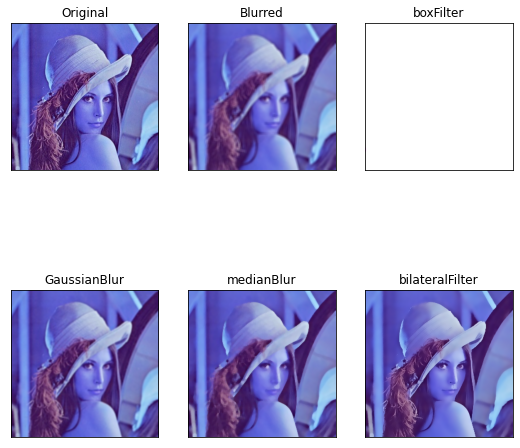

In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg')
blur1 = cv2.blur(img,(5,5))
# normalize=0，不进行归一化处理，直接使用邻域像素值的和,因此滤波得到的值很可能超过当前像素值范围的最大值，从而被截断为最大值。
# 这样，就会得到一幅纯白色的图像。
blur2 = cv2.boxFilter(img,-1,(5,5),normalize=0)
blur3 = cv2.GaussianBlur(img,(5,5),0)
blur4 = cv2.medianBlur(img,5)
blur5 = cv2.bilateralFilter(img,9,75,75)
plt.figure(figsize=(9,9))

plt.subplot(231),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(blur1),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(blur2),plt.title('boxFilter')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(blur3),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(blur4),plt.title('medianBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(blur5),plt.title('bilateralFilter')
plt.xticks([]), plt.yticks([])
plt.show()

### 形态转换

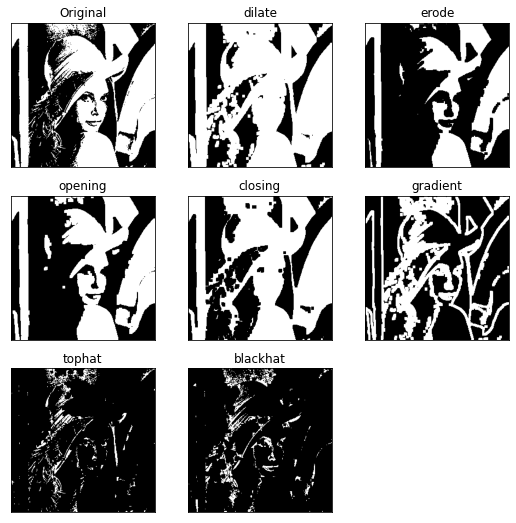

In [43]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg',0)
ret,th = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

kernel = np.ones((5,5),np.float32)

dilate = cv2.dilate(th,kernel,iterations = 1)
erode = cv2.erode(th,kernel,iterations = 1)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(th, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(th, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(th, cv2.MORPH_BLACKHAT, kernel)


plt.figure(figsize=(9,9))

plt.subplot(331),plt.imshow(th,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(dilate,'gray'),plt.title('dilate')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(erode,'gray'),plt.title('erode')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(opening,'gray'),plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(closing,'gray'),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(gradient,'gray'),plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(tophat,'gray'),plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(blackhat,'gray'),plt.title('blackhat')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# 结构元素
# Rectangular Kernel
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

# Elliptical Kernel
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

# Cross-shaped Kernel
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))


### 图像梯度

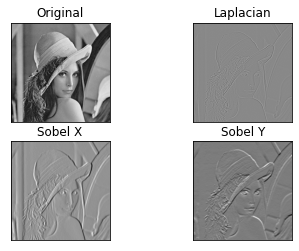

In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


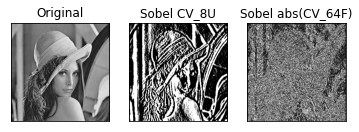

In [45]:
"""
黑白过渡为正斜率（有正值），而白黑过渡为负斜率（有负值）。
所以当你把数据转换成 np.uint8 时，所有的负斜率都变成零。简单来说，你失去了边缘。

如果要检测两条边，更好的选择是将输出数据类型保留为更高的格式，如 cv.CV_16S、cv.CV_64F 等，取其绝对值，然后转换回 cv.CV_8U。
"""

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg',0)
# Output dtype = cv.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()


### Canny 边缘检测

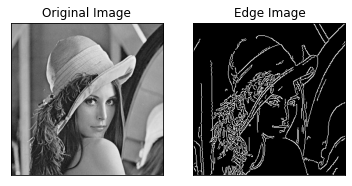

In [46]:
"""
1.降噪
2.寻找强度梯度
3.非最大值抑制
4.滞后阈值

"""

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


### 图像金字塔

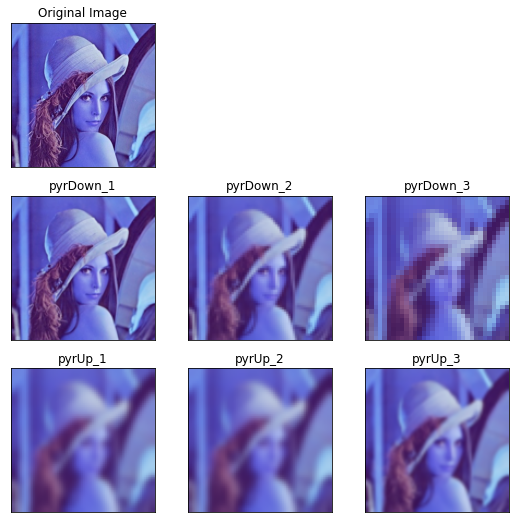

In [53]:
# 1）高斯金字塔和 2）拉普拉斯金字塔
img = cv2.imread('lena.jpg')
lower_reso_1 = cv2.pyrDown(img)
lower_reso_2 = cv2.pyrDown(lower_reso_1)
lower_reso_3 = cv2.pyrDown(lower_reso_2)
higher_reso_3 = cv2.pyrUp(lower_reso_3)
higher_reso_2 = cv2.pyrUp(lower_reso_3)
higher_reso_1 = cv2.pyrUp(lower_reso_2)

plt.figure(figsize=(9,9))

plt.subplot(331),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(lower_reso_1)
plt.title('pyrDown_1'), plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(lower_reso_2)
plt.title('pyrDown_2'), plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(lower_reso_3)
plt.title('pyrDown_3'), plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(higher_reso_3)
plt.title('pyrUp_1'), plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(higher_reso_2)
plt.title('pyrUp_2'), plt.xticks([]), plt.yticks([])
plt.subplot(339),plt.imshow(higher_reso_1)
plt.title('pyrUp_3'), plt.xticks([]), plt.yticks([])
plt.show()

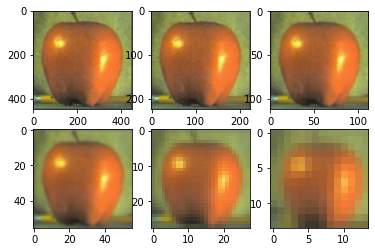

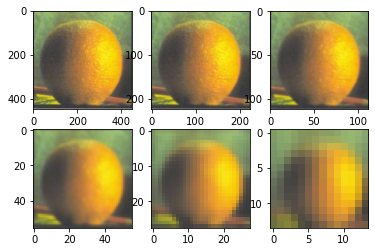

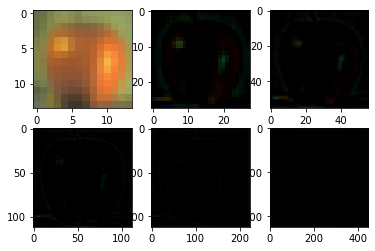

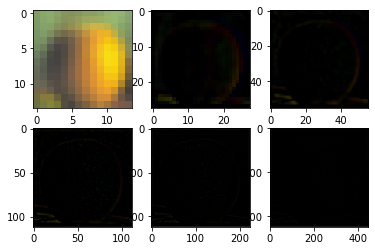

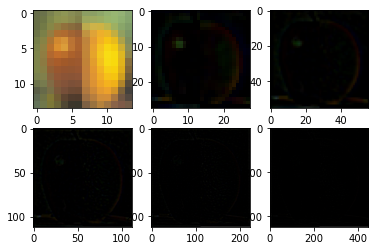

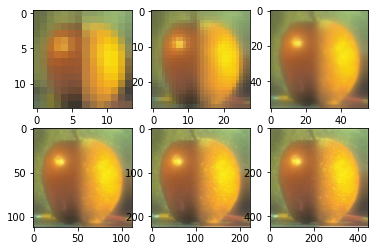

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2042ff8bbe0>)

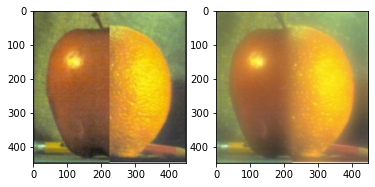

In [19]:
import cv2
import numpy as np,sys
import matplotlib.pyplot as plt
A = cv2.imread('apple.png')
B = cv2.imread('orange.png')
A = cv2.resize(A,(448,448))
B = cv2.resize(B,(448,448))

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
plt.subplot(231), plt.imshow(cv2.cvtColor(gpA[0], cv2.COLOR_BGR2RGB))
for i in range(5):
    G = cv2.pyrDown(G)
    gpA.append(G)
    plt.subplot(2, 3, i+2), plt.imshow(cv2.cvtColor(gpA[i+1], cv2.COLOR_BGR2RGB))

plt.show()

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
plt.subplot(231), plt.imshow(cv2.cvtColor(gpB[0], cv2.COLOR_BGR2RGB))
for i in range(5):
    G = cv2.pyrDown(G)
    gpB.append(G)
    plt.subplot(2, 3, i+2), plt.imshow(cv2.cvtColor(gpB[i+1], cv2.COLOR_BGR2RGB))

plt.show()

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
plt.subplot(231), plt.imshow(cv2.cvtColor(lpA[0], cv2.COLOR_BGR2RGB))
for i in range(5, 0, -1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1], GE)
    lpA.append(L)
    plt.subplot(2, 3, 6-i+1), plt.imshow(cv2.cvtColor(L, cv2.COLOR_BGR2RGB))
plt.show()

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
plt.subplot(231), plt.imshow(cv2.cvtColor(lpB[0], cv2.COLOR_BGR2RGB))
for i in range(5, 0, -1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1], GE)
    lpB.append(L)
    plt.subplot(2, 3, 6-i+1), plt.imshow(cv2.cvtColor(L, cv2.COLOR_BGR2RGB))
plt.show()

# Now add left and right halves of images in each level
LS = []
i = 1
for la, lb in zip(lpA, lpB):
    rows, cols, dpt = la.shape
    ls = np.hstack((la[:, 0: int(cols/2)], lb[:, int(cols/2) :]))
    LS.append(ls)
    plt.subplot(2, 3, i), plt.imshow(cv2.cvtColor(ls, cv2.COLOR_BGR2RGB))
    i += 1
plt.show()
ls_ = LS[0]  # 取出最模糊的那张图片
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB))
for i in range(1, 6):
    ls_ = cv2.pyrUp(ls_)  # 加零，高斯模糊
    ls_ = cv2.add(ls_, LS[i])  # 加差值，提高分辨率
    plt.subplot(2, 3, i+1), plt.imshow(cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB))
plt.show()

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])
# image with direct connecting each half
# 对比直接拼接的效果
real = np.hstack((A[:, :int(cols/2)], B[:, int(cols/2):]))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB))



### 轮廓

In [17]:
import numpy as np
import cv2
img = cv2.imread('mask.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

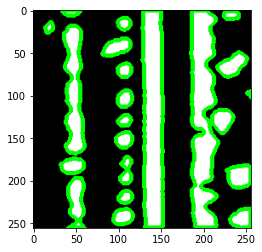

In [27]:
cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

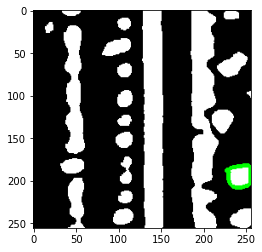

In [37]:
cv2.drawContours(img, contours, 4, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

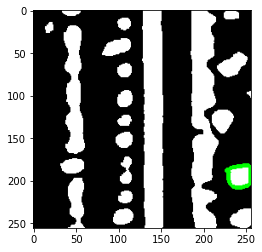

In [32]:
cnt = contours[4]
cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 轮廓近似法


In [ ]:
## cv2.CHAIN_APPROX_NONE 存储所有边界点
## cv2.CHAIN_APPROX_SIMPLE 删除所有冗余点并压缩轮廓，从而节省内存

### 轮廓特征

In [2]:
import numpy as np
import cv2
img = cv2.imread('mask.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[4]
M = cv2.moments(cnt)
print( M )


{'m00': 596.0, 'm10': 144447.0, 'm01': 116106.16666666666, 'm20': 35038861.0, 'm11': 28137611.083333332, 'm02': 22646113.5, 'm30': 8506854687.700001, 'm21': 6824912517.983334, 'm12': 5487777397.15, 'm03': 4422422872.95, 'mu20': 30579.441275171936, 'mu11': -1965.1859619654715, 'mu02': 27586.75834265724, 'mu30': -12043.80125617981, 'mu21': -20543.49799170997, 'mu12': 14282.524433062412, 'mu03': 7748.944796562195, 'nu20': 0.08608689156786839, 'nu11': -0.005532368930356379, 'nu02': 0.0776619249770766, 'nu30': -0.001388826296316863, 'nu21': -0.0023689655468683295, 'nu12': 0.001646983795937942, 'nu03': 0.0008935665802896931}


In [20]:
# 质心
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
(cx,cy)

(242, 194)

In [21]:
# 轮廓周长
perimeter = cv2.arcLength(cnt,True)
perimeter

99.4558435678482

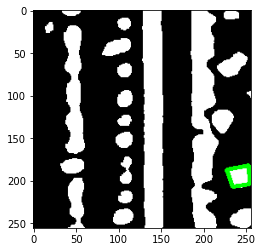

In [26]:
# 轮廓近似
import matplotlib.pyplot as plt
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
img = cv2.imread('mask.png',3)
cv2.drawContours(img, [approx], 0, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 凸包

In [34]:
# returnPoints：默认情况下为True,返回凸包的坐标
# 如果为False，与凸包点相对应的轮廓点的索引
hull = cv2.convexHull(cnt, returnPoints = False)

In [38]:
# 检查凸度
cv2.isContourConvex(cnt)

False

In [39]:
cv2.isContourConvex(approx)

True

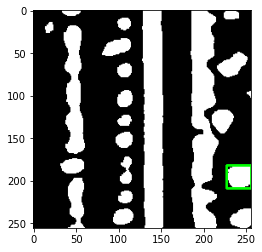

In [45]:
### 边界矩形
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.imread('mask.png',3)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

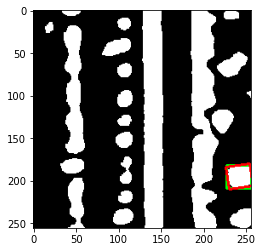

In [46]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 最小外圆

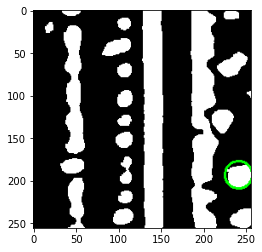

In [48]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.imread('mask.png',3)
cv2.circle(img,center,radius,(0,255,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

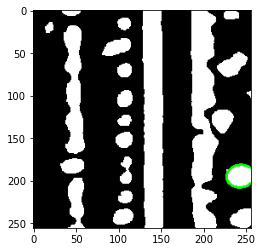

In [51]:
ellipse = cv2.fitEllipse(cnt)
img = cv2.imread('mask.png',3)
cv2.ellipse(img,ellipse,(0,255,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

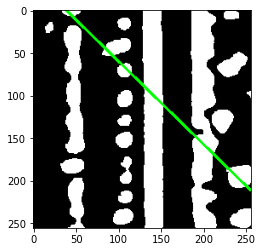

In [53]:
rows,cols = img.shape[:2]
### param： 距离参数，跟所选的距离类型有关，值可以设置为0。
### reps, aeps： 表示拟合直线所需要的径向和角度精度
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.imread('mask.png',3)
cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 轮廓属性


In [57]:
# 长宽比： 对象边界矩形的宽度与高度的比率
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.0740740740740742

In [59]:
# 范围：轮廓区域与边界矩形区域的比率
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
extent

0.7611749680715197

In [60]:
# 固实性：轮廓面积与其凸包面积的比率
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.9551282051282052

In [61]:
# 等效直径：面积与轮廓面积相同的圆的直径
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

27.547246117573295

In [63]:
# 方向：物体指向的角度，还给出了主轴和副轴的长度
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
(x,y),(MA,ma),angle 

((243.11380004882812, 194.55628967285156),
 (26.289438247680664, 32.915462493896484),
 82.59199523925781)

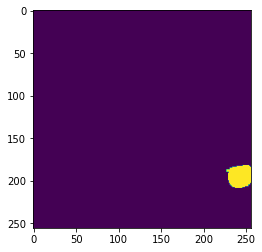

In [68]:
# 遮罩和像素点
mask = np.zeros(imgray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
# pixelpoints = cv.findNonZero(mask)
plt.imshow(mask)

In [71]:
# 最大值，最小值及其位置
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)

In [79]:
# 平均颜色或平均强度
mean_val = cv2.mean(img,mask = mask)

In [80]:
# 极端点:最顶部，最底部，最右侧和最左侧的点
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

### 轮廓：更多功能

In [4]:
# 凸包缺陷
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)
defects
#  [起点，终点，最远点，到最远点的近似距离]

array([[[  0,   2,   1, 217]],

       [[  2,   4,   3, 201]],

       [[  4,   6,   5, 162]],

       [[  6,   9,   8, 343]],

       [[ 10,  14,  12, 703]],

       [[ 14,  16,  15, 162]],

       [[ 16,  18,  17, 114]],

       [[ 19,  21,  20, 162]],

       [[ 22,  26,  25, 211]],

       [[ 26,  29,  27, 181]],

       [[ 29,  31,  30, 114]]], dtype=int32)

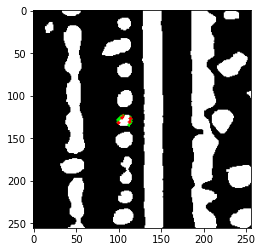

In [25]:
import cv2
import numpy as np
img = cv2.imread('mask.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[8]
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,2,[0,0,255],-1)
# 轮廓近似
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
# 点多边形测试
dist = cv2.pointPolygonTest(cnt,(50,50),True)
dist

-135.08515832614626

In [ ]:
# 检测点是否在轮廓内

# 参数： contour       ---输入轮廓
#        pt            ---针对轮廓需要测试的点
#        measure_dist  ---
# 当measureDist设置为true时，返回实际距离值。若返回值为正，表示点在多边形内部，返回值为负，表示在多边形外部，返回值为0，表示在多边形上。
# 当measureDist设置为false时，返回 -1、0、1三个固定值。若返回值为+1，表示点在多边形内部，返回值为-1，表示在多边形外部，返回值为0，表示在多边形上。

#     cv2.pointPolygonTest(contour,pt,measure_dist)

In [26]:
# 匹配形状
import cv2
import numpy as np
img = cv2.imread('mask.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt1 = contours[8]
cnt2 = contours[2]

# 返回显示相似性的度量。结果越低，匹配越好
cv2.matchShapes(cnt1,cnt2,1,0.0)

### OCR的简单步骤
### cv2.matchShapes()比较数字或字母的图像

0.08685571926117658

In [27]:
# 轮廓层次结构
#     [Next，Previous，First_Child，Parent]
# 轮廓检索模式
    # cv2.RETR_LIST:检索所有轮廓，但不创建任何父子关系。在这个规则下，父母和孩子是平等的，他们只是轮廓。即它们都属于同一层次结构级别。
    # cv2.RETR_TREE:返回 所有轮廓，并且创建一个完整的组织结构列表
    # cv2.RETR_CCOMP:返回所有的轮廓并将轮廓分为两级组织结构
    # cv2.RETR_EXTERNAL:仅返回极端的外部标志 所有的子轮廓都会被忽略掉

### 直方图

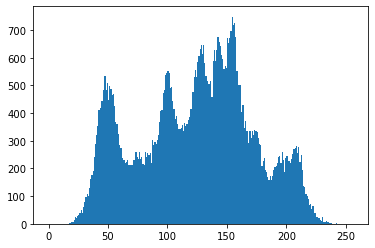

In [38]:
# BINS
# DIMS 
# 范围 
img = cv2.imread('lena.jpg',0)
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [41]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [37]:
hist = np.bincount(img.ravel(),minlength = 256)

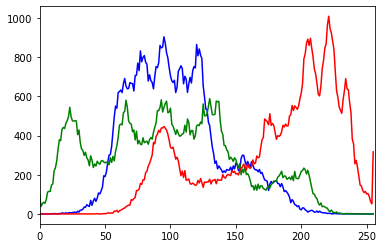

In [40]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

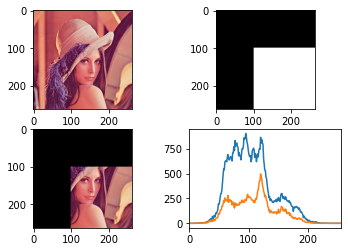

In [44]:

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(222), plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.subplot(223), plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


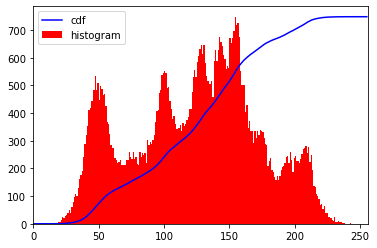

In [45]:
# 直方图均衡
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


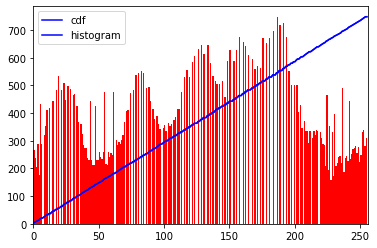

In [53]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

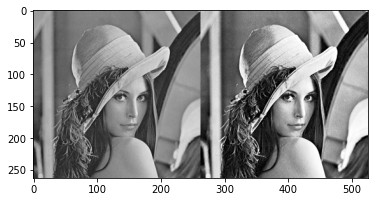

In [52]:
# 直方图均衡
img = cv2.imread('lena.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()


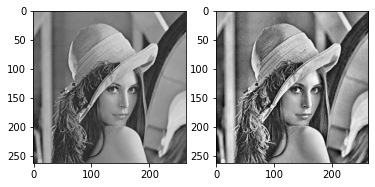

In [55]:
# CLAHE(对比度受限的自适应直方图均衡)
import numpy as np
import cv2
img = cv2.imread('lena.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(cl1, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(cl1, cv2.COLOR_BGR2RGB))
plt.show()

###  2D直方图

In [57]:

import numpy as np
import cv2
img = cv2.imread('lena.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# BGR转换为HSV
# channels = [0,1]， 因为我们需要同时处理H和S平面。
# bins = [180,256] 对于H平面为180，对于S平面为256。
# range= [0,180,0,256] 色相值介于0和180之间，饱和度介于0和256之间。
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
hist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist, xbins, ybins = np.histogram2d(hsv[0].ravel(),hsv[1].ravel(),[180,256],[[0,180],[0,256]])
hist

array([[29.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., 76.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

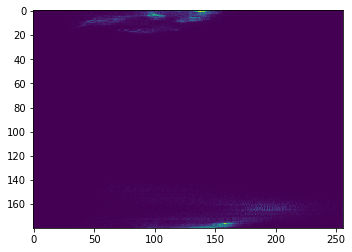

In [62]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()


### 直方图反投影

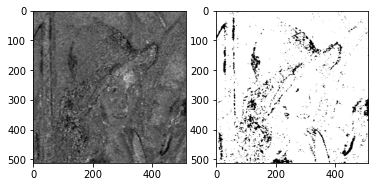

In [75]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#roi需要查找区域
roi = cv2.imread('lena.jpg')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
#查找的目标区域
target = cv2.imread('lenaNoise.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
#目标直方图
M = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
#带搜索直方图
I = cv2.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )
#计算反向投影 R
np.seterr(divide='ignore', invalid='ignore')  # 消除被除数为0的警告

R=M/I
h,s,v = cv2.split(hsvt)
B = R[h.ravel(),s.ravel()]
B = np.minimum(B,1)
B = B.reshape(hsvt.shape[:2])
#卷积
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
B=cv2.filter2D(B,-1,disc)
B = np.uint8(B)
cv2.normalize(B,B,0,255,cv2.NORM_MINMAX)

#二值化
ret,thresh = cv2.threshold(B,50,255,0)
plt.subplot(121), plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

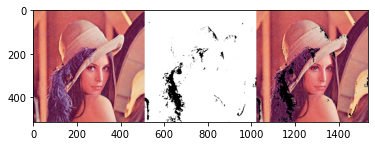

In [78]:
import numpy as np
import cv2
roi = cv2.imread('lena.jpg')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
#查找的目标区域
target = cv2.imread('lenaNoise.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)
# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
res = np.hstack((target,thresh,res))

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

### 图像转换

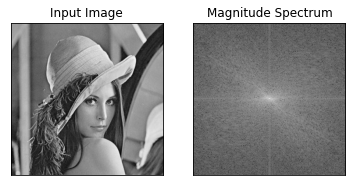

In [82]:
# 傅里叶变换
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


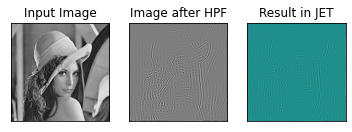

In [83]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
## 一些波纹状结构，称为 振铃效应 。
## 这是由我们用于遮罩的矩形窗口引起的。此蒙版转换为正弦形状，从而导致此问题。因此，矩形窗口不用于过滤。更好的选择是高斯窗口。
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()


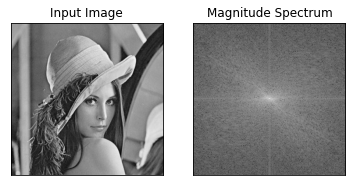

In [84]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lena.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(263, 263)

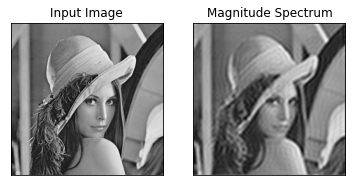

In [89]:
rows, cols = img.shape
row,col = int(rows/2) , int(cols/2)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[row-30:row+30, col-30:col+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [90]:
img = cv2.imread('lena.jpg',0)
rows,cols = img.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
nrows,ncols

(270, 270)

In [ ]:
# nimg = np.zeros((nrows,ncols))
# nimg[:rows,:cols] = img
# # or
# right = ncols - cols
# bottom = nrows - rows
# bordertype = cv2.BORDER_CONSTANT #just to avoid line breakup in PDF file
# nimg = cv2.copyMakeBorder(img,0,bottom,0,right,bordertype, value = 0)


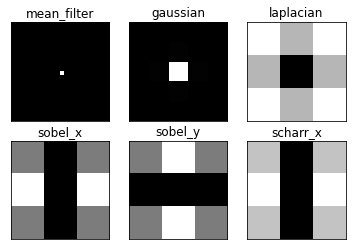

In [93]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# simple averaging filter without scaling parameter
mean_filter = np.ones((30,30))
# creating a gaussian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()


### 模板匹配

In [1]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 
img = cv2.imread('lena.jpg', 0)
template = cv2.imread('face.jpg', 0)
h, w = template.shape[:2] 

    TM_SQDIFF：计算平方不同，计算出来的值越小，越相关
    TM_CCORR：计算相关性，计算出来的值越大，越相关
    TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
    TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
    TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
    TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关

In [2]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

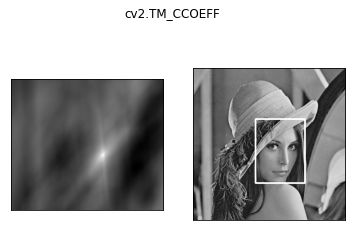

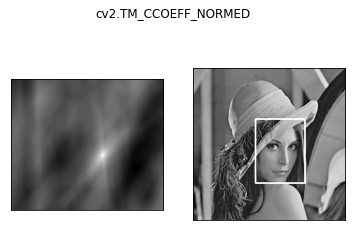

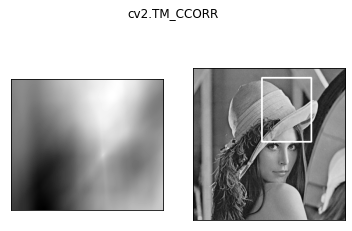

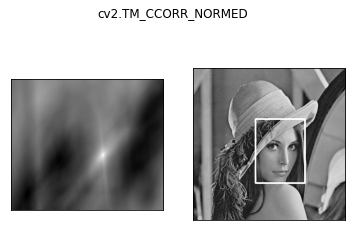

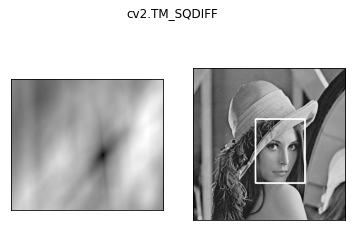

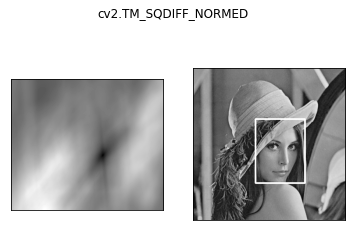

In [4]:
for meth in methods:
    img2 = img.copy()

    # 匹配方法的真值
    method = eval(meth)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # 如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # 画矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

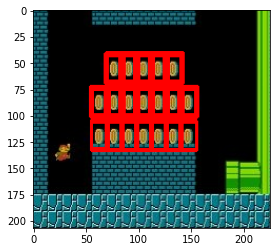

In [6]:
img_rgb = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.jpg', 0)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
# 取匹配程度大于%80的坐标
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):  # *号表示可选参数
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()

### 霍夫线变换

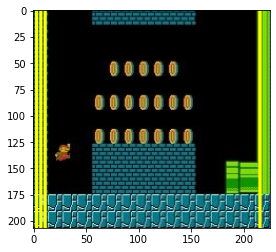

In [15]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 
img_rgb = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,2,np.pi/180,250)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_rgb,(x1,y1),(x2,y2),(0,255,255),2)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()


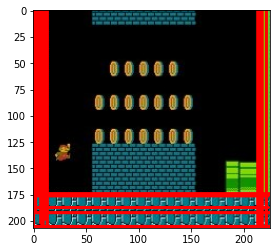

In [18]:
import cv2
import numpy as np
img_rgb = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img_rgb,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()

### 霍夫圆变换

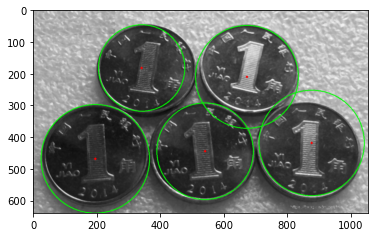

In [40]:
import numpy as np
import cv2
img = cv2.imread('coins.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,100,
                            param1=100,param2=85,minRadius=100,maxRadius=200)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.show()


### 基于分水岭算法的图像分割

In [43]:
# 基于标记的分水岭分割功能

img = np.zeros((400, 400), np.uint8)
cv2.circle(img, (150, 150), 100, 255, -1)
cv2.circle(img, (250, 250), 100, 255, -1)

dist = cv2.distanceTransform(img, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
dist3 = np.zeros((dist.shape[0], dist.shape[1], 3), dtype = np.uint8)
dist3[:, :, 0] = dist
dist3[:, :, 1] = dist
dist3[:, :, 2] = dist

markers = np.zeros(img.shape, np.int32)
markers[150,150] = 1  # seed for circle one
markers[250, 250] = 2 # seed for circle two
markers[50,50] =  3   # seeds for background

cv2.watershed(dist3, markers)


array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  3,  3, ...,  3,  3, -1],
       [-1,  3,  3, ...,  3,  3, -1],
       ...,
       [-1,  3,  3, ...,  3,  3, -1],
       [-1,  3,  3, ...,  3,  3, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [44]:
import numpy as np
import cv2


def watershed(imgpath):
    img = cv2.imread(imgpath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret0, thresh0 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh0,cv2.MORPH_OPEN,kernel, iterations = 2)

    # 确定背景区域
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # 确定前景区域
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret1, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

    # 查找未知区域
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # 标记标签
    ret2, markers1 = cv2.connectedComponents(sure_fg)
    markers = markers1+1
    markers[unknown==255] = 0

    markers3 = cv2.watershed(img,markers)
    img[markers3 == -1] = [0,255,0]
    return thresh0,sure_bg,sure_fg,img

if __name__ == '__main__':
    imgpath = './coins.png'
    thresh0, sure_bg, sure_fg, img = watershed(imgpath)

    cv2.imshow('thresh0',thresh0)
    cv2.imshow('sure_bg', sure_bg)
    cv2.imshow('sure_fg', sure_fg)
    cv2.imshow('result_img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


C:\Users\LEO\AppData\Local\Temp/ipykernel_9184/492893535.py:18: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi =feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=image)   #寻找峰值


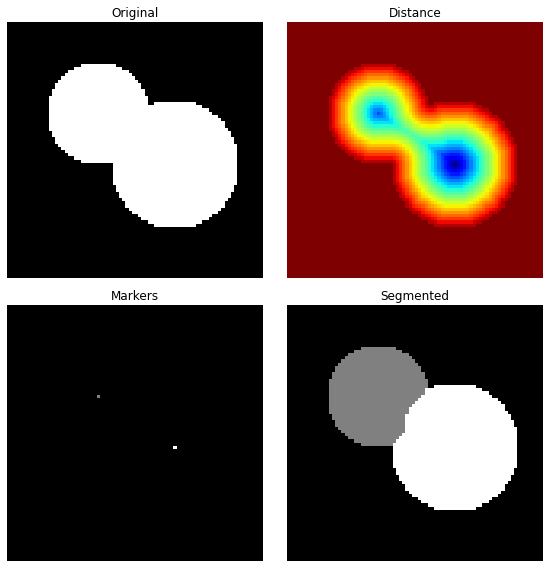

In [53]:
# 基于距离变换的分山岭图像分割

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology,feature,segmentation

#创建两个带有重叠圆的图像
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

#现在我们用分水岭算法分离两个圆
distance = ndi.distance_transform_edt(image) #距离变换
local_maxi =feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=image)   #寻找峰值
markers = ndi.label(local_maxi)[0]           #初始标记点
labels =segmentation.watershed(-distance, markers, mask=image) #基于距离变换的分水岭算法
# kimage.segmentation.watershed

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.ravel()
ax0, ax1, ax2, ax3 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title("Original")
ax1.imshow(-distance, cmap=plt.cm.jet, interpolation='nearest')
ax1.set_title("Distance")
ax2.imshow(markers, cmap=plt.cm.gray, interpolation='nearest')
ax2.set_title("Markers")
ax3.imshow(labels, cmap=plt.cm.gray, interpolation='nearest')
ax3.set_title("Segmented")

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()


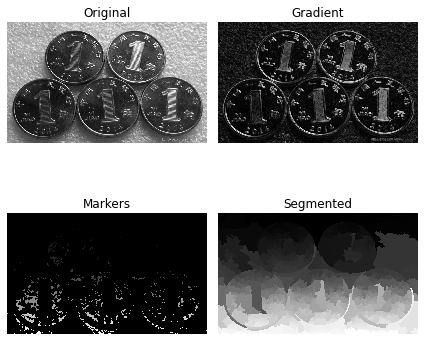

In [50]:
# 基于梯度的分水岭图像分割
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology,color,data,filters,segmentation

image = cv2.imread('coins.png',0)

denoised = filters.rank.median(image, morphology.disk(2)) #过滤噪声

#将梯度值低于10的作为开始标记点
markers = filters.rank.gradient(denoised, morphology.disk(5)) <10
markers = ndi.label(markers)[0]

gradient = filters.rank.gradient(denoised, morphology.disk(2)) #计算梯度
labels =segmentation.watershed(gradient, markers, mask=image) #基于梯度的分水岭算法

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
axes = axes.ravel()
ax0, ax1, ax2, ax3 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title("Original")
ax1.imshow(gradient, cmap=plt.cm.gray, interpolation='nearest')
ax1.set_title("Gradient")
ax2.imshow(markers, cmap=plt.cm.gray, interpolation='nearest')
ax2.set_title("Markers")
ax3.imshow(labels, cmap=plt.cm.gray, interpolation='nearest')
ax3.set_title("Segmented")

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()


### 基于 GrabCut 算法的交互式前景提取*

In [3]:
import cv2
import numpy as np
 
def mouseEvent(event, x, y, flags, param):
    
    global img, position1, position2 
    
    image = img.copy()   
    
    if event == cv2.EVENT_LBUTTONDOWN:                                          #按下左键
        position1 = (x,y)                                                       #获取鼠标的坐标(起始位置)
 
    elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:      #按住左键拖曳不放开
        cv2.rectangle(image, position1, (x,y), (0,255,0), 1)                    #画出矩形选定框
        cv2.imshow('image', image)
        
    elif event == cv2.EVENT_LBUTTONUP:                                          #放开左键
        position2 = (x,y)                                                       #获取鼠标的最终位置
        cv2.rectangle(image, position1, position2, (0,0,255), 3)                #画出最终的矩形 
        cv2.imshow('image', image)
        
        min_x = min(position1[0],position2[0])                                  #获得最小的坐标，因为可以由下往上拖动选定框     
        min_y = min(position1[1],position2[1])
        width = abs(position1[0] - position2[0])                                #为了适配rect的格式
        height = abs(position1[1] - position2[1])
        
        mask = np.zeros(img.shape[:2],np.uint8)                                 #初始化蒙版图像
        bgdModel = np.zeros((1,65),np.float64)                                  #内算法使用的零数组
        fgdModel = np.zeros((1,65),np.float64)
        rect = (min_x,min_y,width,height)                                       #选定的前景区域
        cv2.grabCut(image,mask,rect,bgdModel,fgdModel,50,cv2.GC_INIT_WITH_RECT)  #函数返回值为mask,bgdModel,fgdModel
        mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')               #代码中将0和2合并为背景 1和3合并为前景
        
        img1 = image*mask2[:,:,np.newaxis]                                      #使用蒙板来获取前景区域
        cv2.imshow('GMM',img1)
 
def main():
    
    global img
    img = cv2.imread('./coins.png',cv2.IMREAD_ANYCOLOR)
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', mouseEvent)
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
 
if __name__ == '__main__':
    main()

### 理解特征

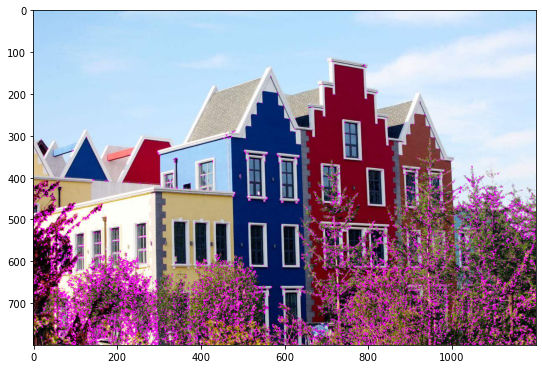

In [16]:
# harris角点检测
# cv2.cornerHarris()
    # img： 数据类型为 ﬂoat32 的入图像
    # blockSize： 角点检测中指定区域的大小
    # ksize： Sobel求导中使用的窗口大小
    # k： 取值参数为 [0,04,0.06]
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('house.jpg')
# print ('img.shape:',img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
# print ('dst.shape:',dst.shape)
img[dst>0.01*dst.max()]=[255,0,255]
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

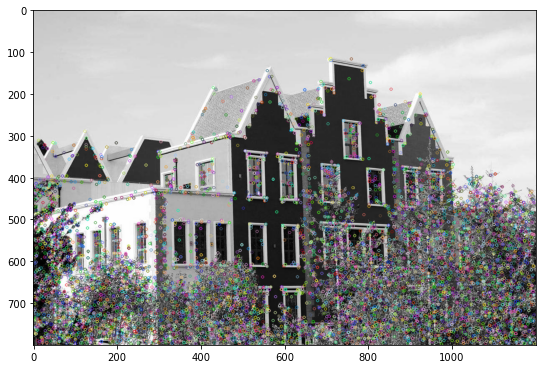

In [21]:
# Scale Invariant Feature Transform（SIFT）
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img = cv2.drawKeypoints(gray, kp, img)
# 计算特征
kp, des = sift.compute(gray, kp)

plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

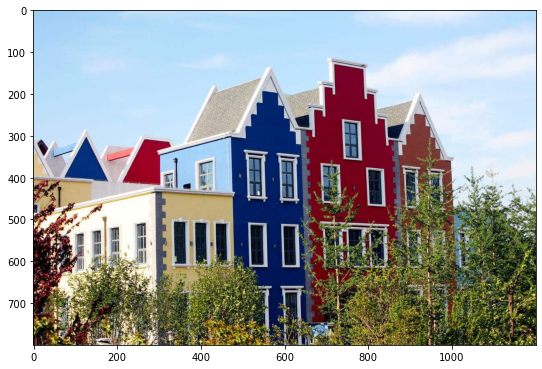

In [24]:
# 亚像素级精度的角点

import numpy as np
import cv2
filename = 'house.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,255,255]
img[res[:,3],res[:,2]] = [255,255,0]

plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


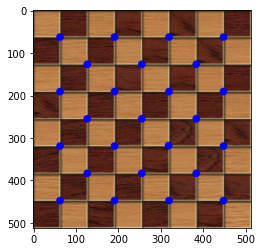

In [33]:
# 更适合在目标追踪中使用
# Shi-Tomasi角点检测和追踪
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('chessboard.jpg')
gray = cv2.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),9,(255,0,0),-1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
# surf 用不了 须回退版本

img = cv2.imread('house.png',0)
surf = cv2.SURF_create(400)
kp, des = surf.detectAndCompute(img,None)

AttributeError: module 'cv2' has no attribute 'SURF_create'

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 36181


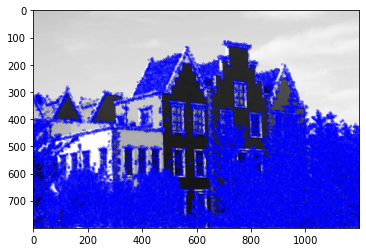

Total Keypoints without nonmaxSuppression: 130934


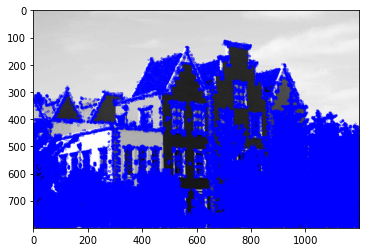

In [37]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('house.jpg',0)
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()


In [38]:
# BRIEF Binary Robust Independent Elementary Features

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('house.jpg',0)
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )


32
(2009, 32)


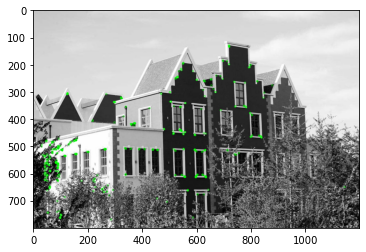

In [40]:
# ORB Oriented FAST and Rotated BRIEF

img = cv2.imread('house.jpg',0)
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

### 特征匹配

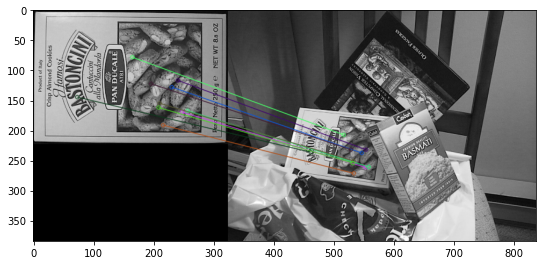

In [43]:
####  Brute-Force蛮力匹配
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('box.png', 0)
img2 = cv2.imread('box_in_scene.png', 0)

sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [ ]:
# 一对一的匹配

# crossCheck表示两个特征点要互相匹，例如A中的第i个特征点与B中的第j个特征点最近的，并且B中的第j个特征点到A中的第i个特征点也是 
#NORM_L2: 归一化数组的(欧几里德距离)，如果其他特征计算方法需要考虑不同的匹配计算方式
bf = cv2.BFMatcher(crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], None, flags=2)
plt.figure(figsize=(9,9))
plt.imshow(img3)
plt.show()

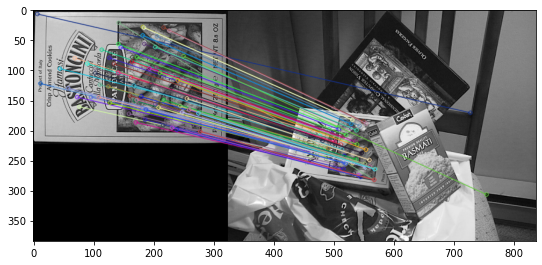

In [44]:
# k对最佳匹配
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.figure(figsize=(9,9))
plt.imshow(img3)
plt.show()

### 基于 FLANN 的匹配器

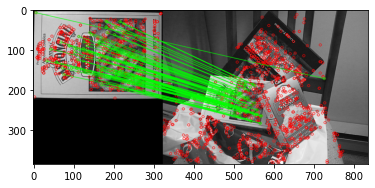

In [48]:

import numpy as np
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3)
plt.show()


### 特征匹配+ Homography查找对象

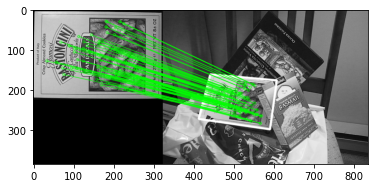

In [51]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread('box.png',0)          # queryImage
img2 = cv.imread('box_in_scene.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w= img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray')
plt.show()


In [61]:
## Meanshift

import numpy as np
import cv2

cap = cv2.VideoCapture('test.avi')

# 获取视频的第一帧
ret,frame = cap.read()

# 设置窗口的初始位置
r,h,c,w = 200,100,500,50  # 简单地硬编码值
track_window = (c,r,w,h)

# 设置 ROI(图像范围)以进行跟踪
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# 设置结束标志，10 次迭代或至少 1 次移动
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # 运行 meanshift 算法用以获取新的位置
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # 绘制到新图像中
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv.imshow('img',img2)

        k = cv.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
cv.destroyAllWindows()
cap.release()


In [65]:
## Camshift

import numpy as np
import cv2

cap = cv2.VideoCapture('test.avi')

# 获取视频的第一帧
ret,frame = cap.read()

# 设置窗口的初始位置
r,h,c,w = 200,100,500,50  # 简单地硬编码值
track_window = (c,r,w,h)

# 设置 ROI(图像范围)以进行跟踪
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# 设置结束标志，10 次迭代或至少 1 次移动
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # 运行 Camshift 用以获取新的位置
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)

        # 绘制到新图像中
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            pass
    else:
        break
cv.destroyAllWindows()
cap.release()



### 背景建模

In [63]:
import numpy as np
import cv2

#经典的测试视频
cap = cv2.VideoCapture('test.avi')
#形态学操作需要使用
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#创建混合高斯模型用于背景建模
fgbg = cv2.createBackgroundSubtractorMOG2()

# fgbg = cv.bgsegm.createBackgroundSubtractorMOG()

# fgbg = cv.bgsegm.createBackgroundSubtractorGMG()



while(True):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    #形态学开运算去噪点
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    #寻找视频中的轮廓
    contours, hierarchy = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        #计算各轮廓的周长
        perimeter = cv2.arcLength(c,True)
        if perimeter > 188:
            #找到一个直矩形（不会旋转）
            x,y,w,h = cv2.boundingRect(c)
            #画出这个矩形
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)    

    cv2.imshow('frame',frame)
    cv2.imshow('fgmask', fgmask)
    k = cv2.waitKey(150) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()


### 光流估计

In [69]:
import numpy as np
import cv2

cap = cv2.VideoCapture('test.avi')

# 角点检测所需参数
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7)

# lucas kanade参数
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2)

# 随机颜色条
color = np.random.randint(0,255,(100,3))

# 拿到第一帧图像
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
# 返回所有检测特征点，需要输入图像，角点最大数量（效率），品质因子（特征值越大的越好，来筛选）
# 距离相当于这区间有比这个角点强的，就不要这个弱的了
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# 创建一个mask
mask = np.zeros_like(old_frame)

while(True):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 需要传入前一帧和当前图像以及前一帧检测到的角点
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # st=1表示
    good_new = p1[st==1]
    good_old = p0[st==1]

    # 绘制轨迹
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        a,b,c,d = int(a), int(b), int(c), int(a)
#         mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(150) & 0xff
    if k == 27:
        break

    # 更新
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cv2.destroyAllWindows()
cap.release()

In [70]:
import cv2
import numpy as np

cap = cv2.VideoCapture("test.avi")

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2',bgr)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',bgr)
    prvs = next

cap.release()
cv2.destroyAllWindows()


### 相机校准
### 姿势估计
### 线性几何
### 立体图像的深度图

In [71]:
# 暂略

### K-最近邻算法

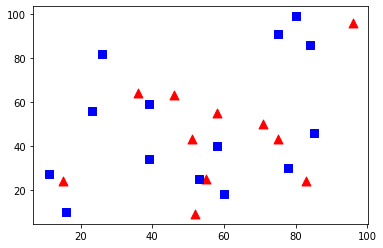

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)

# Labels each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)

# Take Red families and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')

# Take Blue families and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

plt.show()


result:  [[1.]]

neighbours:  [[0. 1. 1.]]

distance:  [[ 37. 306. 488.]]



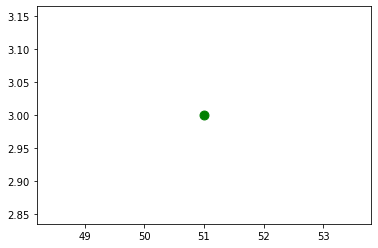

In [73]:
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)

print( "result:  {}\n".format(results) )
print( "neighbours:  {}\n".format(neighbours) )
print( "distance:  {}\n".format(dist) )

plt.show()


In [74]:
# 10 new comers
newcomers = np.random.randint(0,100,(10,2)).astype(np.float32)
ret, results,neighbours,dist = knn.findNearest(newcomer, 3)
# The results also will contain 10 labels.


In [77]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)

# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )


91.76


In [78]:
# save the data
np.savez('knn_data.npz',train=train, train_labels=train_labels)

# Now load the data
with np.load('knn_data.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']


['train', 'train_labels']


### 英文字母的 OCR

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the data, converters convert the letter to a number
data= np.loadtxt('letter-recognition.data', dtype= 'float32', delimiter = ',',
                    converters= {0: lambda ch: ord(ch)-ord('A')})

# split the data to two, 10000 each for train and test
train, test = np.vsplit(data,2)

# split trainData and testData to features and responses
responses, trainData = np.hsplit(train,[1])
labels, testData = np.hsplit(test,[1])

# Initiate the kNN, classify, measure accuracy.
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
ret, result, neighbours, dist = knn.findNearest(testData, k=5)

correct = np.count_nonzero(result == labels)
accuracy = correct*100.0/10000
print( accuracy )


93.06


### SVM

In [79]:
def deskew(img):
    m = cv.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img,M,(SZ, SZ),flags=affine_flags)
    return img


In [80]:
def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist


In [81]:
#!/usr/bin/env python

import cv2
import numpy as np

SZ=20
bin_n = 16 # Number of bins

affine_flags = cv2.WARP_INVERSE_MAP|cv2.INTER_LINEAR

def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img,M,(SZ, SZ),flags=affine_flags)
    return img

def hog(img):
    gx = cv2.Sobel(img, cv.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist

img = cv2.imread('digits.png',0)
if img is None:
    raise Exception("we need the digits.png image from samples/data here !")

cells = [np.hsplit(row,100) for row in np.vsplit(img,50)]

# First half is trainData, remaining is testData
train_cells = [ i[:50] for i in cells ]
test_cells = [ i[50:] for i in cells]

deskewed = [list(map(deskew,row)) for row in train_cells]
hogdata = [list(map(hog,row)) for row in deskewed]
trainData = np.float32(hogdata).reshape(-1,64)
responses = np.repeat(np.arange(10),250)[:,np.newaxis]

svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setType(cv2.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)

svm.train(trainData, cv2.ml.ROW_SAMPLE, responses)
svm.save('svm_data.dat')

deskewed = [list(map(deskew,row)) for row in test_cells]
hogdata = [list(map(hog,row)) for row in deskewed]
testData = np.float32(hogdata).reshape(-1,bin_n*4)
result = svm.predict(testData)[1]

mask = result==responses
correct = np.count_nonzero(mask)
print(correct*100.0/result.size)


93.44


### K-Means

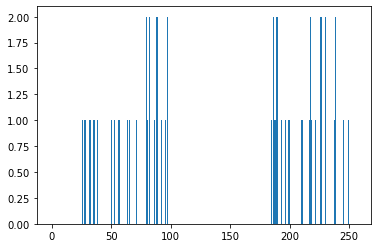

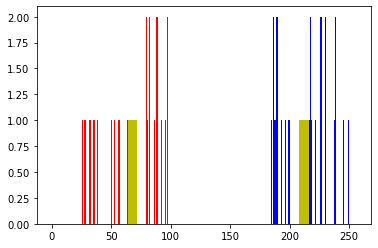

In [88]:
# 单特征
import numpy as np
import cv2
from matplotlib import pyplot as plt

x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z,256,[0,256])
plt.show()
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness,labels,centers = cv2.kmeans(z,2,None,criteria,10,flags)
A = z[labels==0]
B = z[labels==1]
# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()


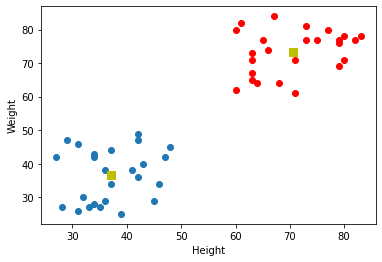

In [89]:
# 多特征
import numpy as np
import cv2
from matplotlib import pyplot as plt

X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))

# convert to np.float32
Z = np.float32(Z)

# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


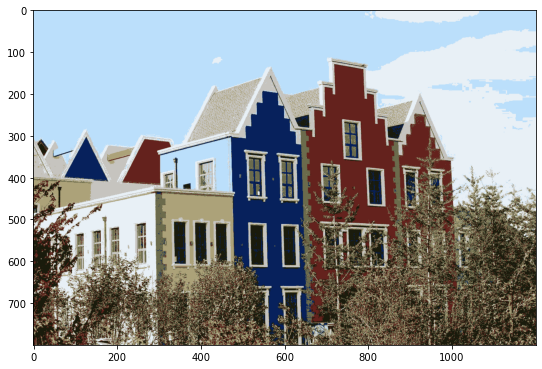

In [94]:
# 色彩量化

import numpy as np
import cv2

img = cv2.imread('house.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.show()


### 图像去噪

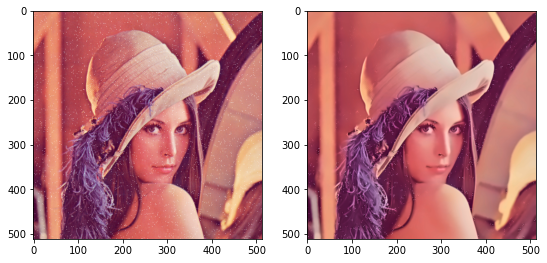

In [98]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('lenaNoise.png')

dst=cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.figure(figsize=(9,9))
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()


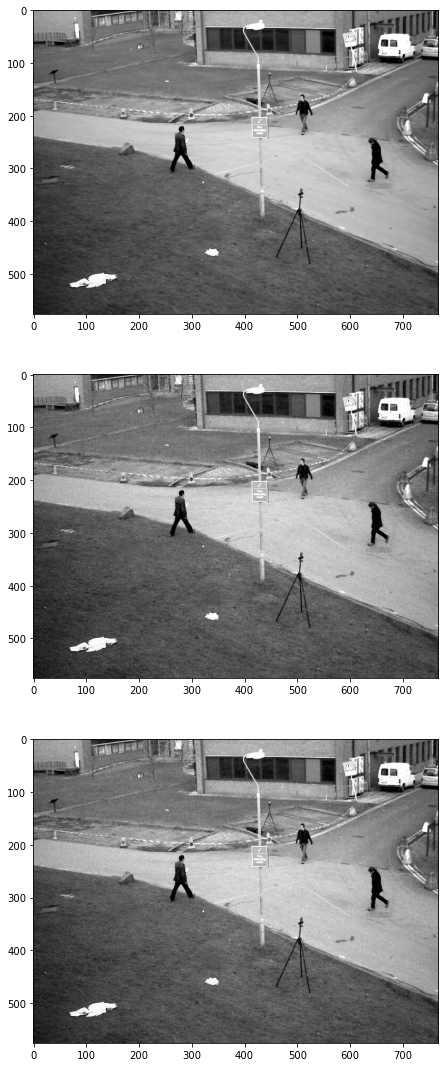

In [103]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('test.avi')
# create a list of first 5 frames
img = [cap.read()[1] for i in range(5)]

# convert all to grayscale
gray = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in img]

# convert all to float64
gray = [np.float64(i) for i in gray]

# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10

# Add this noise to images
noisy = [i+noise for i in gray]

# Convert back to uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]

# Denoise 3rd frame considering all the 5 frames

dst = cv2.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7,35)

plt.figure(figsize=(19,19))
plt.subplot(311),plt.imshow(gray[2],'gray')
plt.subplot(312),plt.imshow(noisy[2],'gray')
plt.subplot(313),plt.imshow(dst,'gray')
plt.show()


### 图像修复

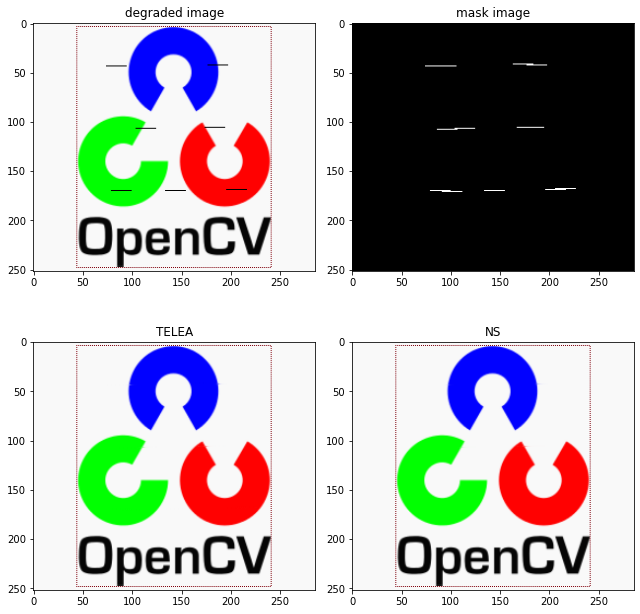

In [106]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('OpenCV_Logo_B.png')     # input
mask = cv2.imread('OpenCV_Logo_C.png',0)  # mask

dst_TELEA = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
dst_NS = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)

plt.figure(figsize=(9,9))
plt.subplot(221), plt.imshow(img)
plt.title('degraded image')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.title('mask image')
plt.subplot(223), plt.imshow(dst_TELEA)
plt.title('TELEA')
plt.subplot(224), plt.imshow(dst_NS)
plt.title('NS')

plt.tight_layout()
plt.show()

In [108]:
# 图像修复交互式案例——通过水流填充算法来修复被破坏的图像区域；
# 使用俩种方法进行修复
# cv2.INPAINT_TELEA （Fast Marching Method 快速行进算法），对位于点附近、边界法线附近和边界轮廓上的像素赋予更多权重。一旦一个像素被修复，它将使用快速行进的方法移动到下一个最近的像素。
# cv2.INPAINT_NS 流体力学算法，使用了流体力学的一些方法，基本原则是启发式的，首先沿着边从已知区域移动到未知区域（因为边是连续的）。它在匹配修复区域边界处的渐变向量的同时，继续等高线（连接具有相同强度的点的线，就像等高线连接具有相同高程的点一样）。

# USAGE 
# python inpaint.py D:/deepLearning/py-demo/20210808/images/ml.jpg

# 按下鼠标左键,添加点、线，按下鼠标右键，添加矩形框，以制作被污染的需要修复图像
# 按下空格键：执行修复功能
# 按下r键：重置待修复的mask
# 按下esc键，退出
import cv2
import numpy as np


class Sketcher:
    def __init__(self, windowname, dests, colors_func):
        self.prev_pt = None  # 线起始点
        self.drag_start = None  # 矩形起点
        self.drag_rect = None  # 矩形（左上角，右下角）坐标
        self.windowname = windowname
        self.dests = dests
        self.colors_func = colors_func
        self.dirty = False
        self.drawing = False
        self.mode = False
        self.show()
        cv2.setMouseCallback(self.windowname, self.on_mouse)

    def show(self):
        cv2.imshow(self.windowname, self.dests[0])

    def on_mouse(self, event, x, y, flags, param):
        pt = (x, y)
        if event == cv2.EVENT_LBUTTONDOWN:
            self.prev_pt = pt
            self.drawing = True
        elif event == cv2.EVENT_RBUTTONDOWN:
            # 第一次初始化时设定pt，往后保留上一个点作为矩形起点
            if self.drag_start == None:
                self.drag_start = pt

        if self.prev_pt and flags & cv2.EVENT_FLAG_LBUTTON:
            for dst, color in zip(self.dests, self.colors_func()):
                cv2.line(dst, self.prev_pt, pt, color, 5)
            self.dirty = True
            self.prev_pt = pt
            self.show()

        if self.drag_start and flags & cv2.EVENT_FLAG_RBUTTON:
            xo, yo = self.drag_start
            x0, y0 = np.minimum([xo, yo], [x, y])
            x1, y1 = np.maximum([xo, yo], [x, y])
            self.drag_rect = None
            if x1 - x0 > 0 and y1 - y0 > 0:
                self.drag_rect = (x0, y0, x1, y1)
                for dst, color in zip(self.dests, self.colors_func()):
                    cv2.rectangle(dst, (x0, y0), (x1, y1), color, -1)
                self.dirty = True
                self.drag_start = None
                self.drag_rect = None
                self.show()
            else:
                self.drag_start = pt

    @property
    def dragging(self):
        return self.drag_rect is not None


def main():
    import sys

    img = cv2.imread("./lena.jpg")
    if img is None:
        print('Failed to load image file:', fn)
        sys.exit(1)

    img_mark = img.copy()
    mark = np.zeros(img.shape[:2], np.uint8)
    sketch = Sketcher('img', [img_mark, mark], lambda: ((255, 255, 255), 255))

    while True:
        ch = cv2.waitKey()
        if ch == 27:
            break
        if ch == ord(' '):
            cv2.imshow('mask', mark)
            fmmres = cv2.inpaint(img_mark, mark, 3, cv2.INPAINT_TELEA)
            nsres = cv2.inpaint(img_mark, mark, 3, cv2.INPAINT_NS)
            cv2.imshow('inpaint fmm res', fmmres)
            cv2.imshow('inpaint ns res', nsres)
        if ch == ord('r'):
            img_mark[:] = img
            mark[:] = 0
            sketch.show()

    print('Done')


if __name__ == '__main__':
    main()
    cv2.destroyAllWindows()


Done


### 高动态范围（HDR）*

In [123]:
# error: Unknown C++ exception from OpenCV code


### 使用 Haar Cascades 进行人脸检测

In [127]:
import numpy as np
import cv2 as cv
face_cascade = cv.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./haarcascade_eye.xml')
img = cv.imread('lena.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()